---
title: "Convergence of Sequences"
author: "Pablo Winant"
format:
    html: default
    ipynb: default
---

# Tutorial: Convergence


### Solow Model

A representative agent uses capital $k_t$ to produce $y_t$ using the following production function:

$$y_t = k_t^{\alpha}$$

He chooses to consume an amount $c_t \in ]0, y_t]$ and invests what remains:

$$i_t = y_t - c_t$$ 

He accumulates capital $k_t$ according to:

$$k_{t+1} = \left( 1-\delta \right) k_{t} + i_{t}$$

where $\delta$ is the depreciation rate and $i_t$ is the amount invested.

The goal of the representative agent is to maximize:

$$\sum_{t\geq 0} \beta^t U(c_t)$$

where $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ and $\beta<1$ is the discount factor.

For now, we ignore the objective and assume that the saving rate $s=\frac{c_t}{y_t}$ is constant over time.

In [2]:
# # how to represent the model?

# struct Model
#     α
#     β
#     γ
#     δ
# end

# model = Model(0.3, 0.9, 4, 0.1)

Model(0.3, 0.9, 4, 0.1)

In [3]:
# model_2 = recalibrate(model; α=0.3)

Model(0.3, 0.9)

__Create a `NamedTuple` to hold parameter values $\beta=0.96$, $\delta=0.1$, $\alpha=0.3$, $\gamma=4$.__ 

In [3]:
model = (;α=0.3, β=0.1, γ=4.0, δ=0.1  )

(α = 0.3, β = 0.1, γ = 4.0, δ = 0.1)

In [4]:
model.α

0.3

In [5]:
model_2 = merge(model, (;α=0.4))

(α = 0.4, β = 0.1, γ = 4.0, δ = 0.1)

In [7]:
# why not a dictionary
typeof(model) # each named typle has its own type (based on names)


NamedTuple{(:α, :β, :γ, :δ), NTuple{4, Float64}}

__Write down the formula of function $f$ such that $k_{t+1}$: $k_{t+1} = f(k_t)$.__

The equation for capital transition is:
    $...$

__Define a function `f(k::Float64, p::NamedTuple)::Float64` to represent $f$ for a given calibration__

In [9]:
function f(k, model; s=0.3)

    # α = model.α
    # β = model.β
    # γ = model.γ
    # δ = model.δ

    # specialized syntax to "unpack" values from namedtuples
    (;α,β,γ,δ) = model

    y = k^α
    i = s*y
    K = (1-δ)*k + i

    return K

end

f (generic function with 1 method)

In [11]:
f(0.5, model; s=0.4)

0.7749009585424942

__Write a function `simulate(k0::Float64, T::Int, p::NamedTuple)::Vector{Float64}` to compute the simulation over `T` periods starting from initial capital level `k0`.__

In [18]:
# let' s add saving rate as named argumetn

function simulate(k0, model; s=0.4, T=100)
    
    res = [k0]
    for t=1:T
        k = res[end]
        K = f(k, model; s=s)
        push!(res, K)
    end

    return res

end

simulate (generic function with 2 methods)

In [23]:
sim = simulate(0.5, model)

101-element Vector{Float64}:
 0.5
 0.7749009585424942
 1.0679497992469396
 1.3691220146661789
 1.6717439771875893
 1.9712406953317936
 2.2644391998184954
 2.5491450744662236
 2.8238676158995952
 3.087632556067258
 ⋮
 7.234413529429885
 7.235209646662481
 7.2359500610507625
 7.236638668366576
 7.23727909214093
 7.237874702658239
 7.238428634629446
 7.238943803635337
 7.2394229214251595

In [13]:
simulate(k0, model, T; s=0.4) = simulate(k0, model; s=s, T=T)

simulate (generic function with 2 methods)

In [15]:
methods(simulate)

# 2 methods for generic function "simulate" from Main:
 [1] simulate(k0, model; s, T)
     @ ~/Teaching/ensae/mie37/tutorials/2_solow_pablo.ipynb:3
 [2] simulate(k0, model, T; s)
     @ ~/Teaching/ensae/mie37/tutorials/2_solow_pablo.ipynb:1

__Make a nice plot to illustrate the convergence. Do we get convergence from any initial level of capital?__

In [22]:
# different libraries. Main options:
# Plots.jl -> different backends, including matplotlib
# Makie.jl -> fast with easy animations

In [24]:
using Plots

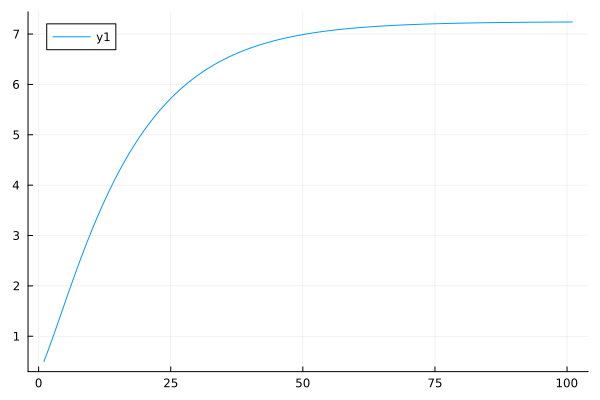

In [25]:
plot(sim)

In [26]:
sim_1 = simulate(0.5, model; s=0.3)
sim_2 = simulate(0.5, model; s=0.4)
sim_3 = simulate(0.5, model; s=0.5)

101-element Vector{Float64}:
 0.5
 0.8561261981781177
 1.2477475382753753
 1.6573008927807404
 2.073393171590884
 2.4883176067712327
 2.8967527254553693
 3.2950061580751355
 3.680539839343968
 4.051654372933684
 ⋮
 9.949900641171165
 9.951039677408726
 9.952099018857133
 9.95308423905062
 9.954000522065433
 9.954852689688693
 9.95564522669805
 9.956382304382648
 9.957067802427053

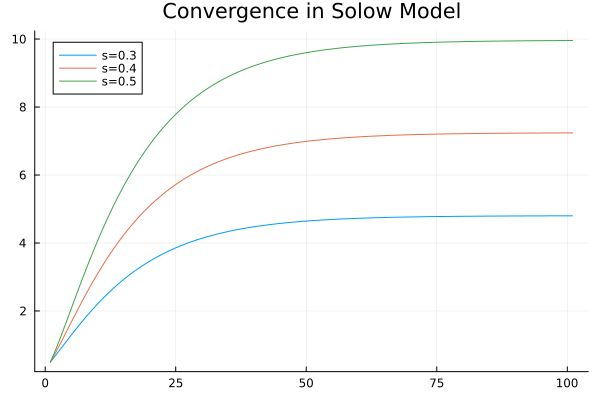

In [30]:
pl = plot(title="Convergence in Solow Model")
plot!(pl, sim_1; label="s=0.3")
plot!(pl, sim_2; label="s=0.4")
plot!(pl, sim_3; label="s=0.5")

__Suppose you were interested in using `f` to compute the steady-state. What would you propose to measure convergence speed? To speed-up convergence? Implement these ideas.__